In [22]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

In [23]:
X = np.vstack([
    np.random.multivariate_normal([0,0],np.eye(2),50),
    np.random.multivariate_normal([5,5],np.eye(2),50)
])

N,D = X.shape
K=2

In [24]:
means = np.array([[1.0,1.0],[4.0,4.0]])
covs = np.array([np.eye(2),np.eye(2)])
weights = np.array([0.5,0.5])
resps = np.zeros((N,K))

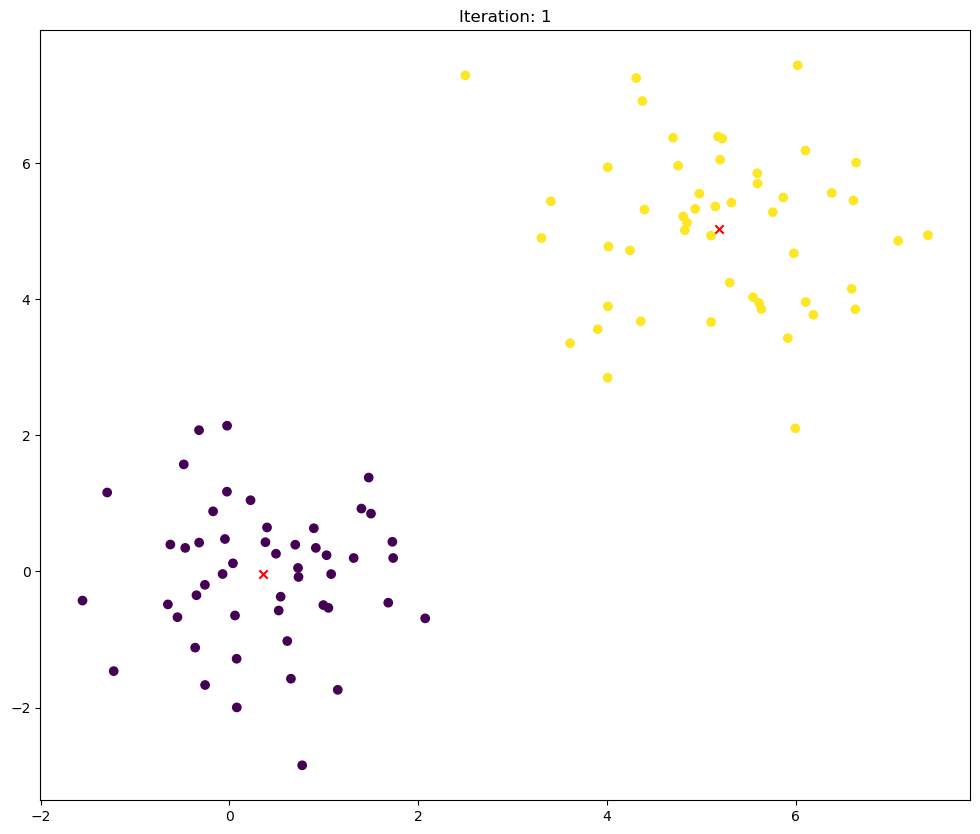

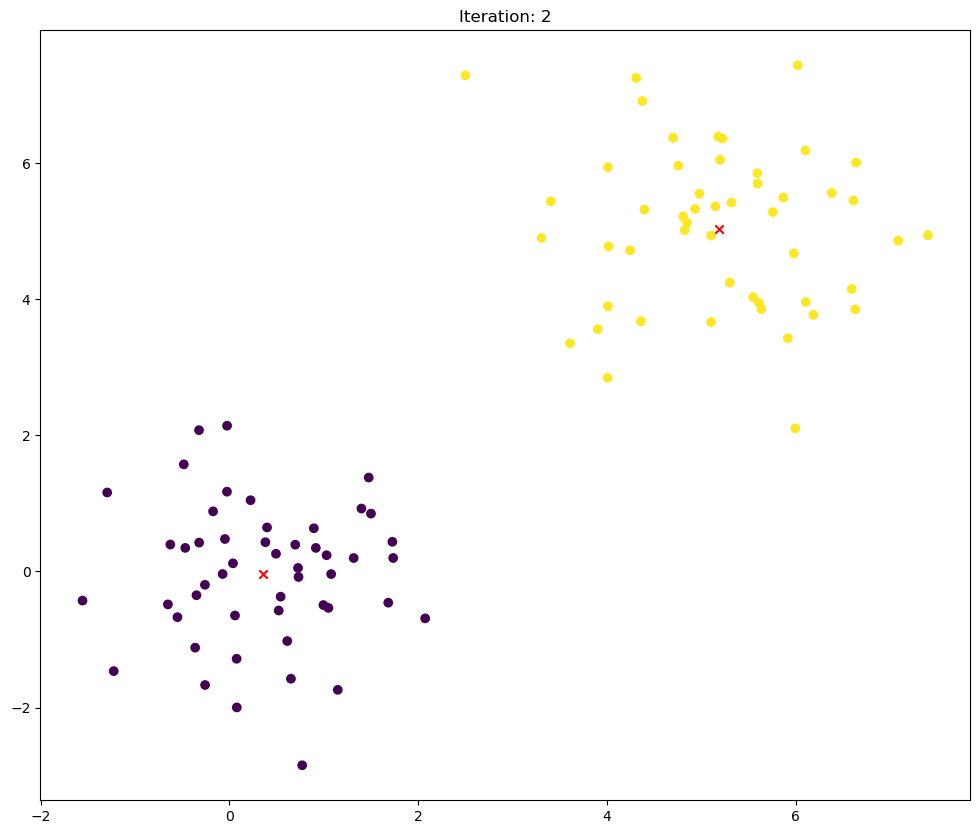

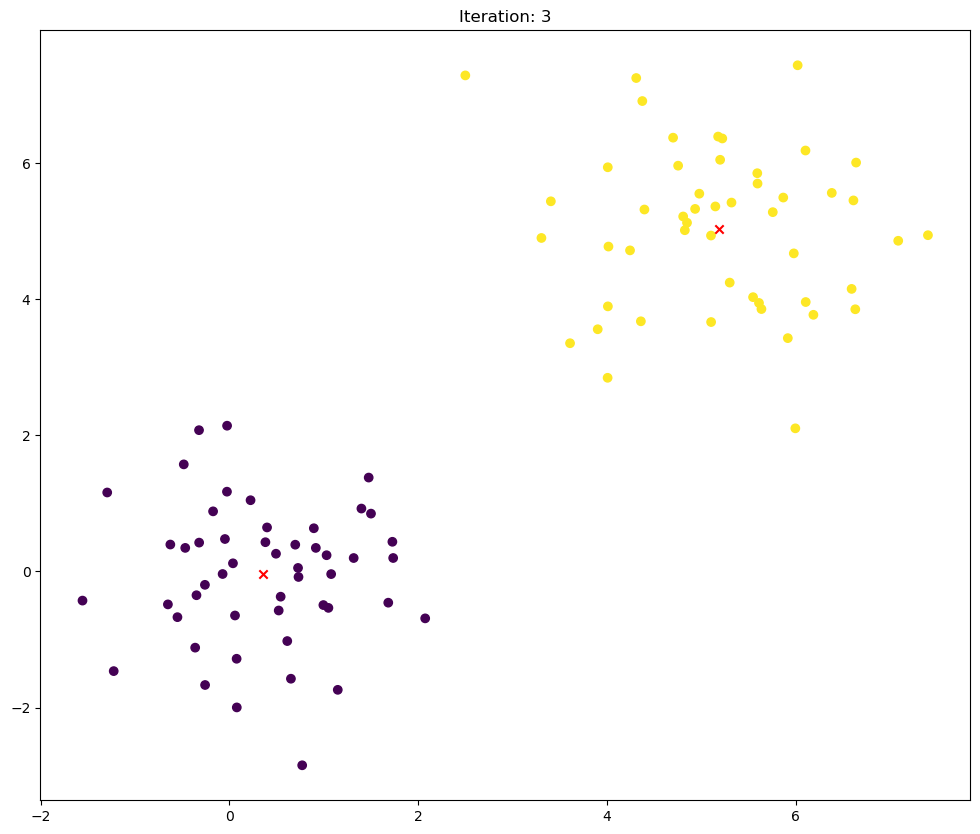

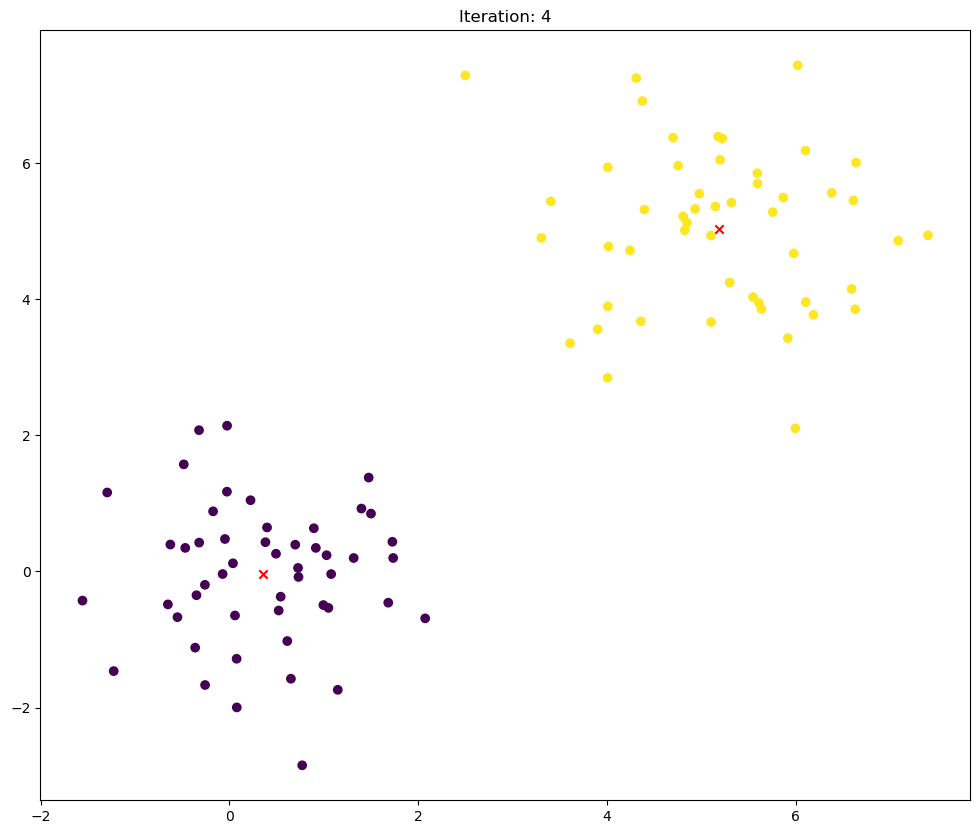

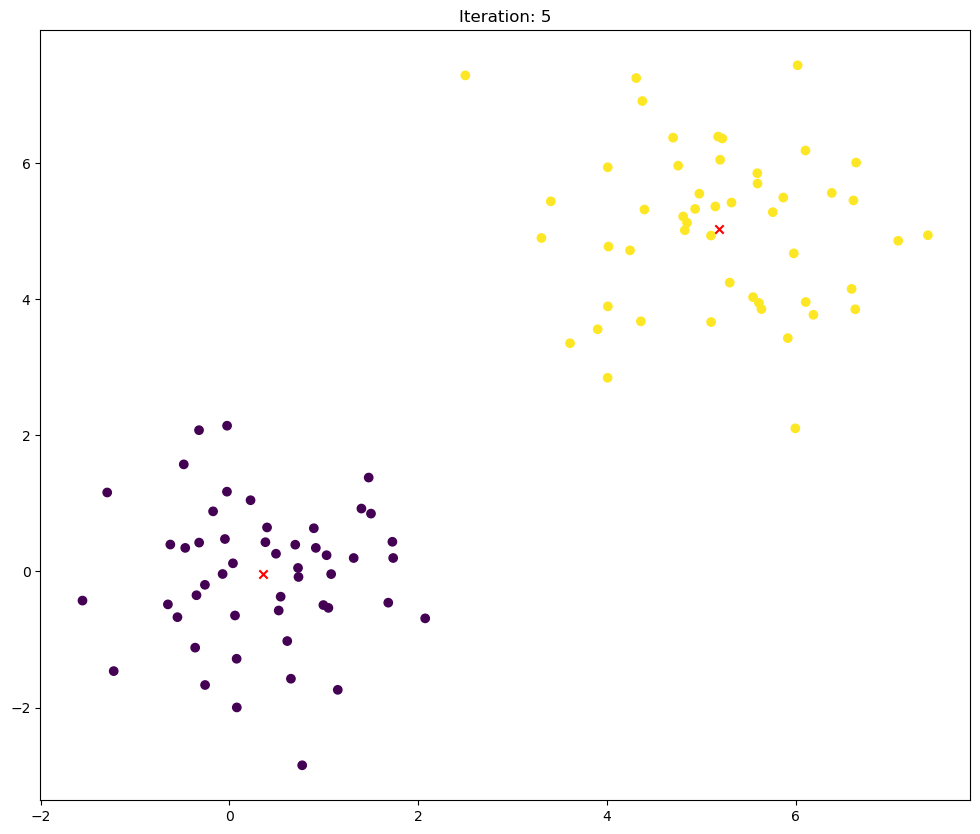

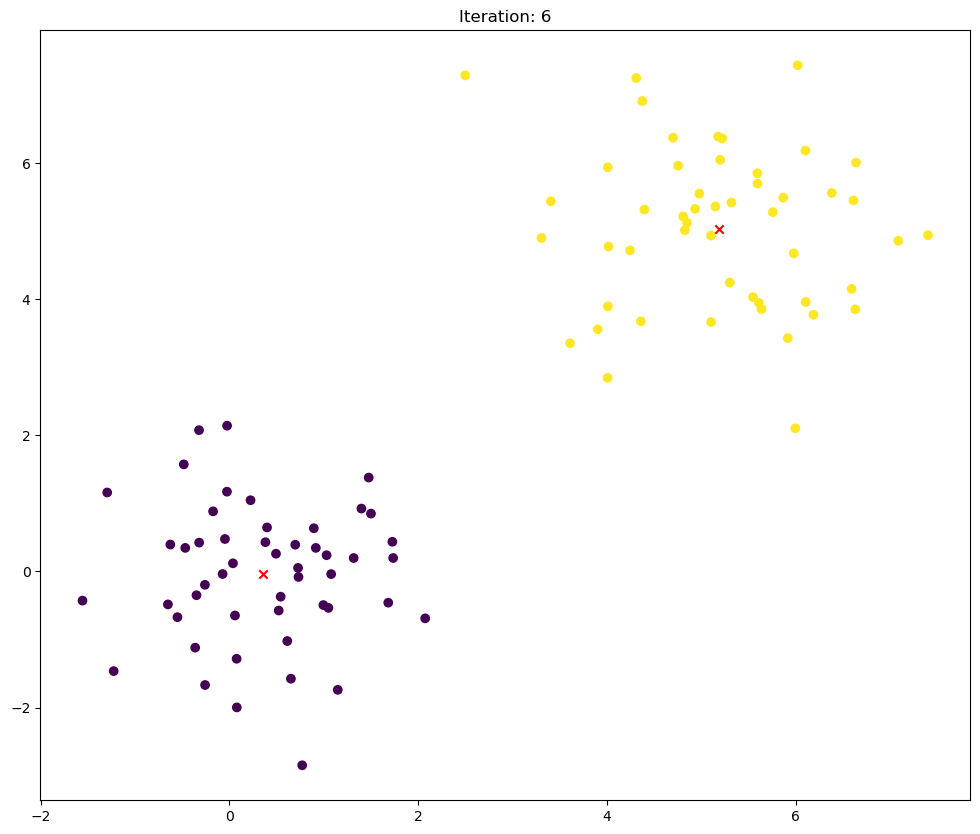

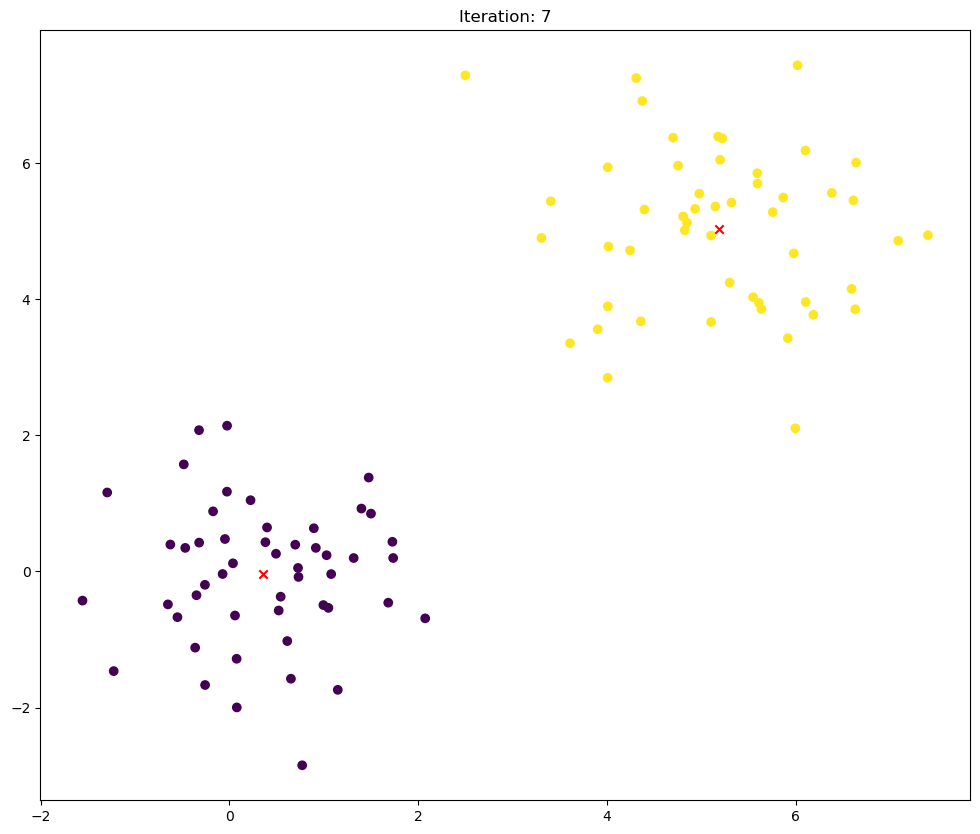

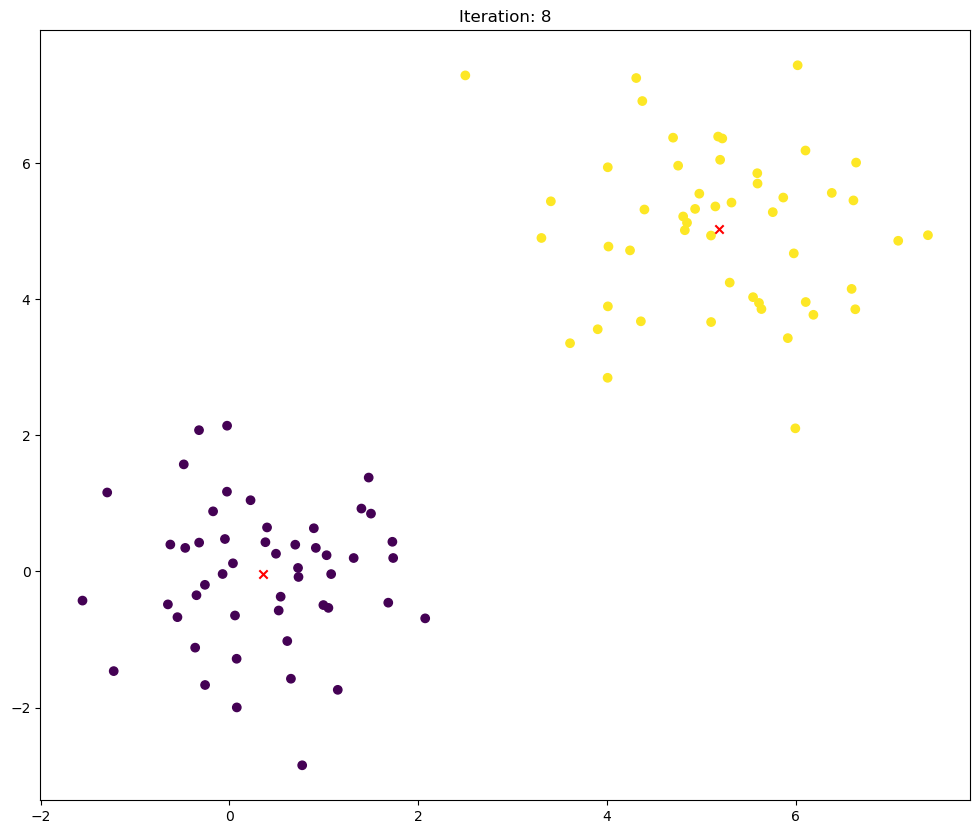

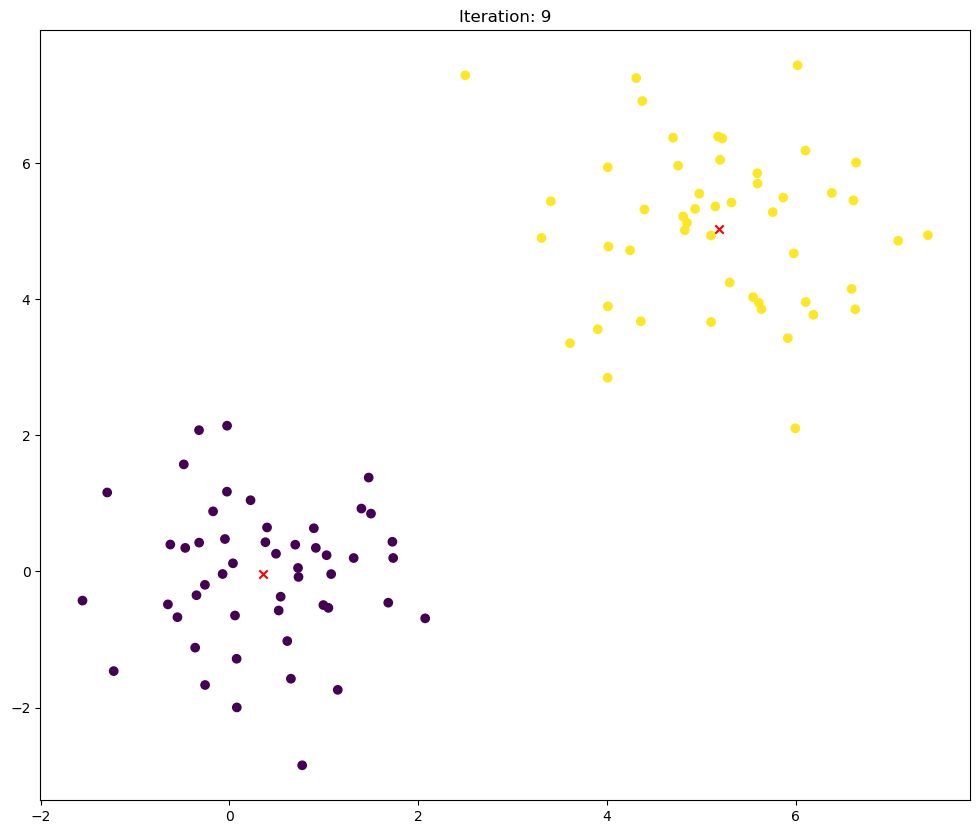

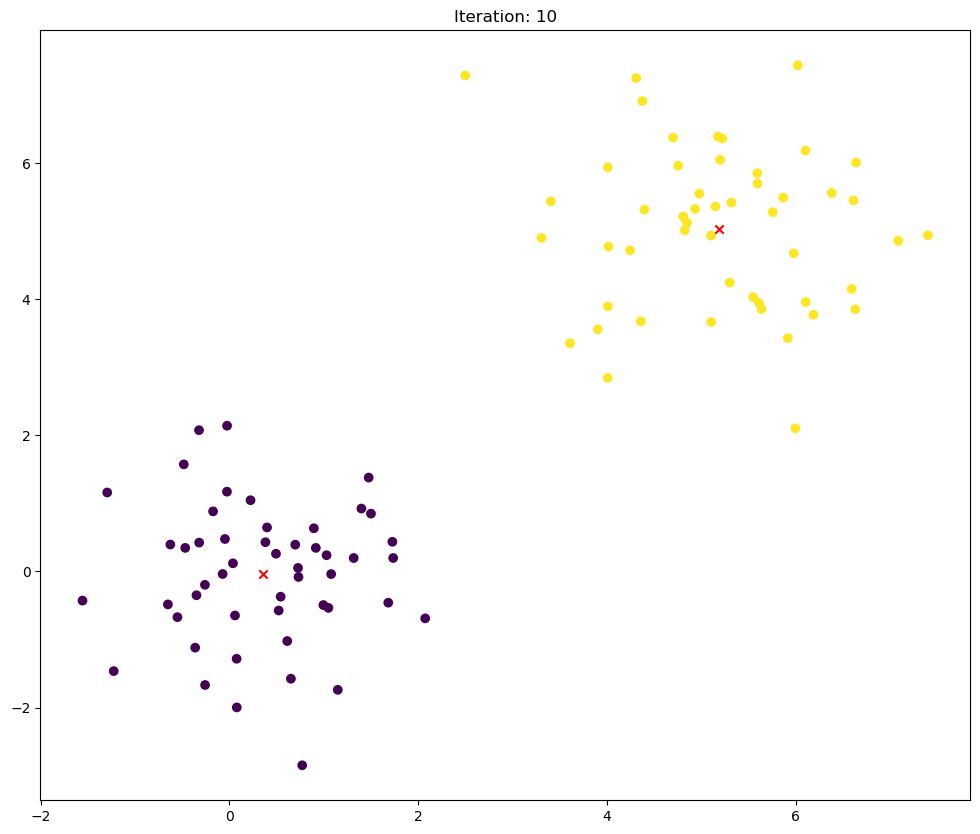

In [31]:
for i in range(10):
    for k in range(K):
        resps[:,k] = weights[k] * multivariate_normal.pdf(X, mean=means[k], cov=covs[k])
    resps /= resps.sum(axis=1, keepdims=True)

    for k in range(K):
        nk = resps[:,k].sum()
        means[k] = (resps[:,k,None]*X).sum(axis=0)/nk
        diff = X - means[k]
        covs[k] = np.dot((resps[:,k,None]*diff).T, diff)/nk
    
    plt.figure(figsize=(12,10))
    plt.scatter(X[:,0], X[:,1], c=np.argmax(resps,axis=1))
    plt.scatter(means[:,0], means[:,1], c='red', marker='x')
    plt.title(f"Iteration: {i+1}")